In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Excels\\iplauction2022.csv",index_col=0)
df.head()

,Player,Base Price,TYPE,COST IN (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [3]:
df.shape

(633, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN (CR.)    237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       199 non-null    object 
 6   Team             633 non-null    object 
dtypes: float64(2), object(5)
memory usage: 39.6+ KB


In [5]:
df.columns

Index(['Player', 'Base Price', 'TYPE', 'COST IN (CR.)', 'Cost IN $ (000)',
       '2021 Squad', 'Team'],
      dtype='object')

In [6]:
df.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN (CR.)      396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [7]:
df[df['Cost IN $ (000)'].isnull()] # print lines where column "Cost in $ (000)" is Null

,Player,Base Price,TYPE,COST IN (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [8]:
df['COST IN (CR.)'] = df['COST IN (CR.)'].fillna(0) # They are unsold so replace from NaN to 0
df["Cost IN $ (000)"] = df['Cost IN $ (000)'].fillna(0)

In [9]:
df.isna().sum()

Player               0
Base Price           0
TYPE                 0
COST IN (CR.)        0
Cost IN $ (000)      0
2021 Squad         434
Team                 0
dtype: int64

In [10]:
df[df['2021 Squad'].isna()]

,Player,Base Price,TYPE,COST IN (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [11]:
df['2021 Squad'] = df['2021 Squad'].fillna("Not Participated in IPL 2021") # new players haven't played in 2021 or unsold

In [12]:
df.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN (CR.)      0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [13]:
# We treated all NaN and null values so we adjust few columns
teams_sold = df[df['COST IN (CR.)'] > 0]['Team'].unique() 
teams_sold

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [14]:
df['status'] = df['Team'].replace(teams_sold,'sold')  # add a new column where Sold players (which COST IN (CR.) > 0) give status

In [15]:
df.head()

,Player,Base Price,TYPE,COST IN (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold


In [16]:
base_price = df['Base Price'].unique()
base_price

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [17]:
df['retention'] = df['Base Price'].replace(base_price,'In Auction')

In [18]:
df

,Player,Base Price,TYPE,COST IN (CR.),Cost IN $ (000),2021 Squad,Team,status,retention
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,In Auction
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,In Auction
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,In Auction
...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction


In [19]:
# Treating Base Price Column
df['base_price_unit'] = df['Base Price'].apply(lambda x:str(x).split(' ')[-1])
# takes base price values , splits when it detects a space " " and then takes the last word which contains the unit

df['base_price'] = df['Base Price'].apply(lambda x:str(x).split(' ')[0])
# takes base price values , split when it detects a space " " and then takes the first word which contains the numeric value

In [20]:
df.head()

,Player,Base Price,TYPE,COST IN (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,In Auction,Pick,Draft
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,In Auction,Pick,Draft
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction,Lakh,40
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,In Auction,Pick,Draft


In [21]:
df['base_price'].unique()

array(['Draft', '2', '40', '20', '1', '75', '50', '30', 'Retained', '1.5'],
      dtype=object)

In [22]:
df['base_price'].replace(['Retained','Draft'],0,inplace=True)

In [23]:
df['base_price'].unique()

array([0, '2', '40', '20', '1', '75', '50', '30', '1.5'], dtype=object)

In [24]:
df['base_price_unit'].unique()

array(['Pick', 'Cr', 'Lakh', 'Retained'], dtype=object)

In [25]:
df['base_price_unit'].replace('Pick',0,inplace=True)

In [26]:
df['base_price_unit'].unique()

array([0, 'Cr', 'Lakh', 'Retained'], dtype=object)

In [27]:
df['base_price_unit'] = df['base_price_unit'].replace({
    'Cr' : 100,
    'Lakh' : 1,
    "Retained" : 0
})

In [28]:
df['base_price_unit'].unique()

array([  0, 100,   1], dtype=int64)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 0 to 632
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN (CR.)    633 non-null    float64
 4   Cost IN $ (000)  633 non-null    float64
 5   2021 Squad       633 non-null    object 
 6   Team             633 non-null    object 
 7   status           633 non-null    object 
 8   retention        633 non-null    object 
 9   base_price_unit  633 non-null    int64  
 10  base_price       633 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 59.3+ KB


In [30]:
df['base_price'] = df['base_price'].astype(float)
df['base_price_unit'] = df['base_price_unit'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 0 to 632
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN (CR.)    633 non-null    float64
 4   Cost IN $ (000)  633 non-null    float64
 5   2021 Squad       633 non-null    object 
 6   Team             633 non-null    object 
 7   status           633 non-null    object 
 8   retention        633 non-null    object 
 9   base_price_unit  633 non-null    int32  
 10  base_price       633 non-null    float64
dtypes: float64(3), int32(1), object(7)
memory usage: 56.9+ KB


In [32]:
df.head()

,Player,Base Price,TYPE,COST IN (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,In Auction,0,0.0
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,In Auction,0,0.0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction,100,2.0
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction,1,40.0
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,In Auction,0,0.0


In [33]:
df['base_price'] = df['base_price']*df['base_price_unit'] # conversion

In [34]:
df.drop(['Base Price','base_price_unit'],axis=1,inplace=True)

In [35]:
df.head()

,Player,TYPE,COST IN (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price
0,Rashid Khan,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,In Auction,0.0
1,Hardik Pandya,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,In Auction,0.0
2,Lockie Ferguson,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction,200.0
3,Rahul Tewatia,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction,40.0
4,Shubman Gill,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,In Auction,0.0


In [36]:
# Creating a whole new database

In [37]:
df = df.rename(columns={
    'TYPE' : "Type",
    'COST IN (CR.)' : 'Sold_for_Lakh',
    'Cost IN $ (000)': 'Cost_in_dollars',
    "2021 Squad": 'Prev_Team',
    'Team' : 'Cur_Team'
})

In [38]:
df.head()

,Player,Type,Sold_for_Lakh,Cost_in_dollars,Prev_Team,Cur_Team,status,retention,base_price
0,Rashid Khan,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,In Auction,0.0
1,Hardik Pandya,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,In Auction,0.0
2,Lockie Ferguson,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction,200.0
3,Rahul Tewatia,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction,40.0
4,Shubman Gill,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,In Auction,0.0


In [39]:
df[df['Player'].duplicated(keep=False)] # check for duplicated players

,Player,Type,Sold_for_Lakh,Cost_in_dollars,Prev_Team,Cur_Team,status,retention,base_price
62,Lalit Yadav,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,sold,In Auction,20.0
240,Amit Mishra,BOWLER,0.00,0.0,DC,Unsold,Unsold,In Auction,150.0
499,Amit Mishra,BOWLER,0.00,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
518,Shivam Sharma,ALL-ROUNDER,0.00,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
530,Lalit Yadav,BOWLER,0.00,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
537,Shubham Singh,ALL-ROUNDER,0.00,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
544,Shubham Singh,BOWLER,0.00,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
569,Shivam Sharma,ALL-ROUNDER,0.00,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0


In [40]:
# Data Analysis

In [41]:
df.shape[0] # How many players participated in the Auction 2022 ?

633

In [42]:
#Participation based on the Role(Batsman, Bowlers, Allrounders and WK) (Type Column)
types = df['Type'].value_counts()
types # without reset_index it returns "Type" Column as index 

Type
ALL-ROUNDER     242
BOWLER          215
BATTER          112
WICKETKEEPER     64
Name: count, dtype: int64

In [43]:
 types.reset_index() # but here it resets index

,Type,count
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


In [44]:
types.values # here gives all values , kinda work like unique 

array([242, 215, 112,  64], dtype=int64)

Text(0.5, 1.0, 'Role of Players Participated')

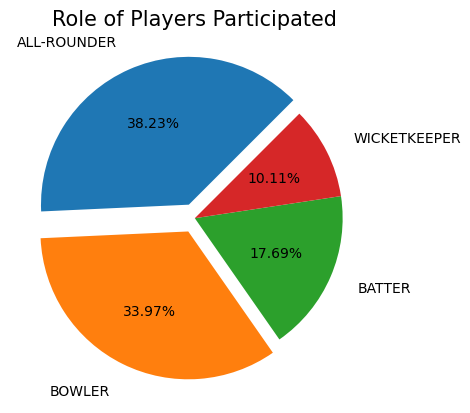

In [45]:
# Pie Chart
plt.pie(types.values,labels=types.index,radius=1,autopct='%1.2f%%',explode=[0.1,0.1,0,0],startangle=45,labeldistance=1.2)

# radius : to make the circle bigger
# autopct : to show percentage with 2 decimal places
# explode : to emphasize certain slices by pulling them out
# startangle : rotates the center angle around which rotates the circle to the specific (45) degree
# labeldistance : moves the label next to the piechart (ALL-ROUNDER) away or closer to the piechart

plt.title("Role of Players Participated",fontsize=15)

Text(0.5, 1.0, 'Sold vs Unsold')

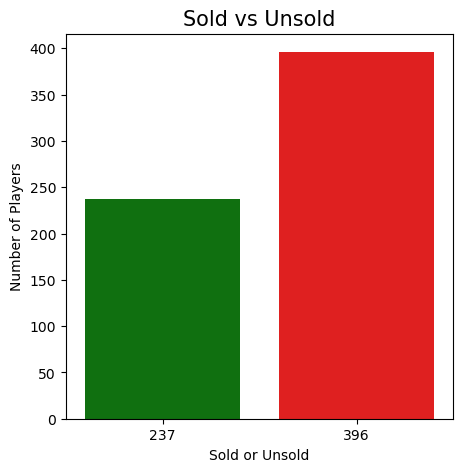

In [46]:
# How many Players Were Sold in IPL 2022 Auctions ?

plt.figure(figsize=(5, 5))
fig = sns.barplot(x=df['status'].value_counts(), y=df['status'].value_counts(), palette=['Green', 'Red'])
plt.xlabel('Sold or Unsold')
plt.ylabel('Number of Players')
plt.title('Sold vs Unsold', fontsize=15)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Gujarat Titans'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Punjab Kings'),
  Text(5, 0, 'Lucknow Super Giants'),
  Text(6, 0, 'Mumbai Indians'),
  Text(7, 0, 'Royal Challengers Bangalore'),
  Text(8, 0, 'Rajasthan Royals'),
  Text(9, 0, 'Sunrisers Hyderabad')])

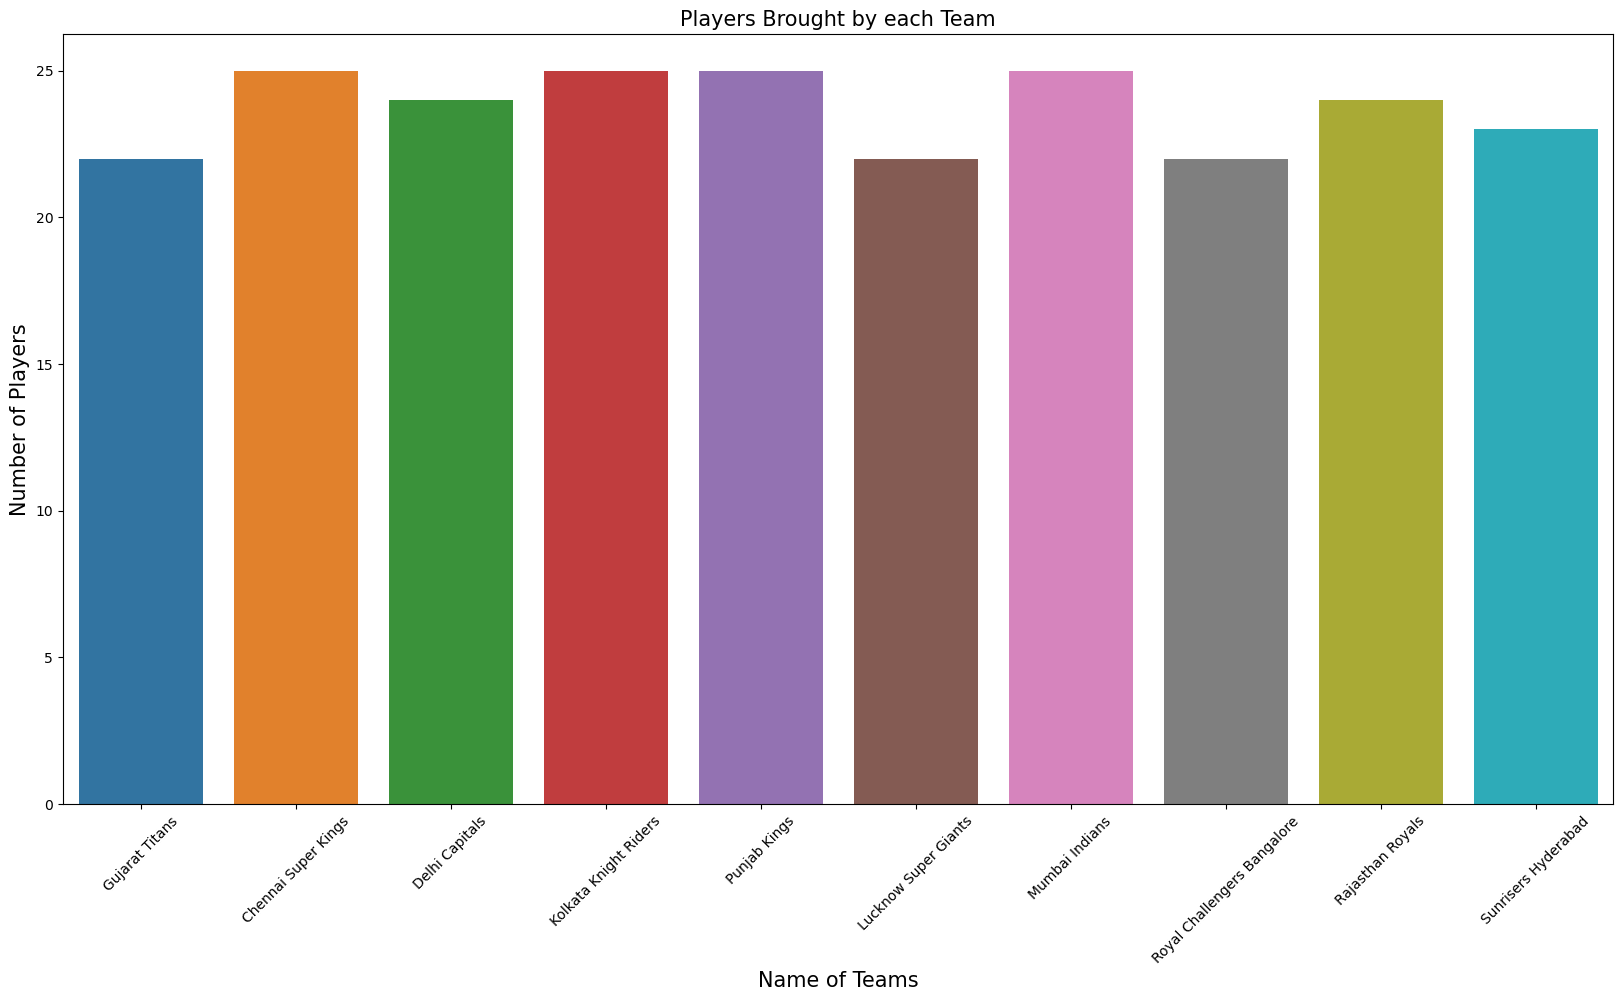

In [47]:
# How many Players Brought by Each Team

plt.figure(figsize=(20,10))
sns.countplot(x=df[df['Cur_Team'] != 'Unsold']['Cur_Team'])
plt.xlabel("Name of Teams",fontsize=15)
plt.ylabel("Number of Players",fontsize=15)
plt.title('Players Brought by each Team',fontsize=15)
plt.xticks(rotation=45)


In [48]:
# How many players Retained/DraftPicked by Each team ?
df.groupby(['Cur_Team','retention'])['retention'].count()[:-1] # [:-1] to remove the unsold column

Cur_Team                     retention 
Chennai Super Kings          In Auction    25
Delhi Capitals               In Auction    24
Gujarat Titans               In Auction    22
Kolkata Knight Riders        In Auction    25
Lucknow Super Giants         In Auction    22
Mumbai Indians               In Auction    25
Punjab Kings                 In Auction    25
Rajasthan Royals             In Auction    24
Royal Challengers Bangalore  In Auction    22
Sunrisers Hyderabad          In Auction    23
Name: retention, dtype: int64

In [49]:
df['Cur_Team'].value_counts()

Cur_Team
Unsold                         396
Chennai Super Kings             25
Kolkata Knight Riders           25
Punjab Kings                    25
Mumbai Indians                  25
Delhi Capitals                  24
Rajasthan Royals                24
Sunrisers Hyderabad             23
Gujarat Titans                  22
Lucknow Super Giants            22
Royal Challengers Bangalore     22
Name: count, dtype: int64

In [50]:
# How many Players were Brought for each Role 
df.groupby(['Type','status'])['Player'].count().reset_index()

,Type,status,Player
0,ALL-ROUNDER,Unsold,154
1,ALL-ROUNDER,sold,88
2,BATTER,Unsold,67
3,BATTER,sold,45
4,BOWLER,Unsold,138
5,BOWLER,sold,77
6,WICKETKEEPER,Unsold,37
7,WICKETKEEPER,sold,27


In [51]:
# Which Are the players who participated in IPL 2021 and will be participating in IPL 2022 and playing in same team
df.head()

,Player,Type,Sold_for_Lakh,Cost_in_dollars,Prev_Team,Cur_Team,status,retention,base_price
0,Rashid Khan,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,In Auction,0.0
1,Hardik Pandya,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,In Auction,0.0
2,Lockie Ferguson,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction,200.0
3,Rahul Tewatia,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction,40.0
4,Shubman Gill,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,In Auction,0.0


In [52]:
# Which Are the players who participated in IPL 2021 and will be participating in IPL 2022 and playing in same team

df.replace({'SRH':'Sunrisers Hyderabad',
            'CSK':'Chennai Super Kings',
            'MI':'Mumbai Indians',
            'KKR':'Kolkata Knight Riders',
            'RR':'Rajasthan Royals',
            'PBKS':'Punjab Kings',
            'DC':'Delhi Capitals',
            'RCB':'Royal Challengers Bangalore'},inplace =True)

In [53]:
same_team = df[(df['Cur_Team'] == df['Prev_Team']) & (df['retention'] == 'In Auction')]
same_team

,Player,Type,Sold_for_Lakh,Cost_in_dollars,Prev_Team,Cur_Team,status,retention,base_price
22,Ravindra Jadeja,ALL-ROUNDER,16.00,2080.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,0.0
23,Deepak Chahar,BOWLER,14.00,1820.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
24,MS Dhoni,WICKETKEEPER,12.00,1560.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,0.0
25,Moeen Ali,ALL-ROUNDER,8.00,1040.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,0.0
26,Ambati Rayudu,WICKETKEEPER,6.75,877.5,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
...,...,...,...,...,...,...,...,...,...
222,T. Natarajan,BOWLER,4.00,520.0,Sunrisers Hyderabad,Sunrisers Hyderabad,sold,In Auction,100.0
223,Abdul Samad,ALL-ROUNDER,4.00,520.0,Sunrisers Hyderabad,Sunrisers Hyderabad,sold,In Auction,0.0
224,Umran Malik,BOWLER,4.00,520.0,Sunrisers Hyderabad,Sunrisers Hyderabad,sold,In Auction,0.0
232,Priyam Garg,BATTER,0.20,26.0,Sunrisers Hyderabad,Sunrisers Hyderabad,sold,In Auction,20.0


In [54]:
same_team[same_team['Cur_Team']=='Royal Challengers Bangalore']

,Player,Type,Sold_for_Lakh,Cost_in_dollars,Prev_Team,Cur_Team,status,retention,base_price
168,Virat Kohli,BATTER,15.00,1950.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,0.0
169,Glenn Maxwell,ALL-ROUNDER,11.00,1430.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,0.0
170,Wanindu Hasaranga,ALL-ROUNDER,10.75,1397.5,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,100.0
171,Harshal Patel,ALL-ROUNDER,10.75,1397.5,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,200.0
174,Mohammed Siraj,BOWLER,7.00,910.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,0.0
177,Shahbaz Ahamad,ALL-ROUNDER,2.40,312.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,30.0
181,Finn Allen,BATTER,0.80,104.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,50.0
185,Suyash Prabhudessai,ALL-ROUNDER,0.30,39.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,20.0
187,Akash Deep,BOWLER,0.20,26.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,20.0


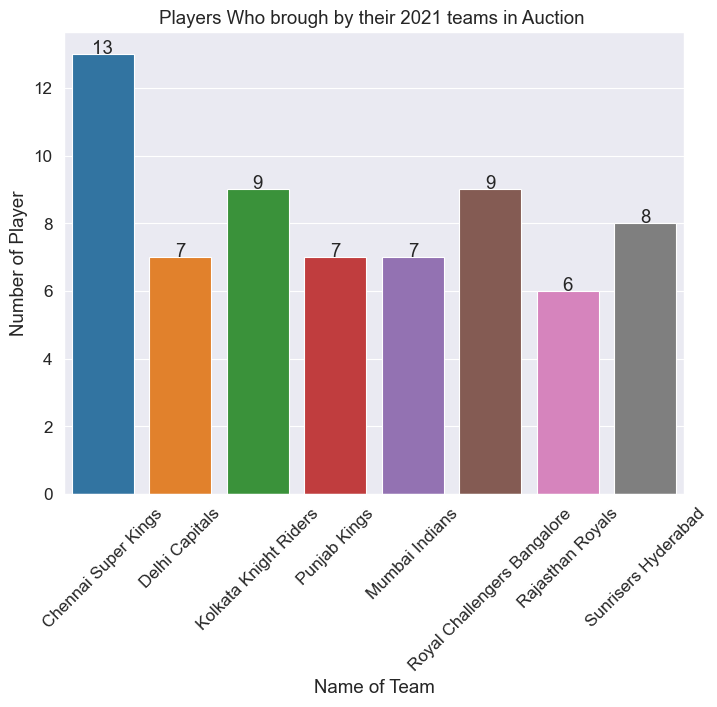

In [55]:
# Let's Visualize this team wise
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.set_style("darkgrid") 
fig = sns.countplot(x=same_team['Cur_Team'])
plt.xticks(rotation=45)
plt.title('Players Who brough by their 2021 teams in Auction ')
plt.xlabel('Name of Team')
plt.ylabel('Number of Player')

# to display number count above the bar
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')


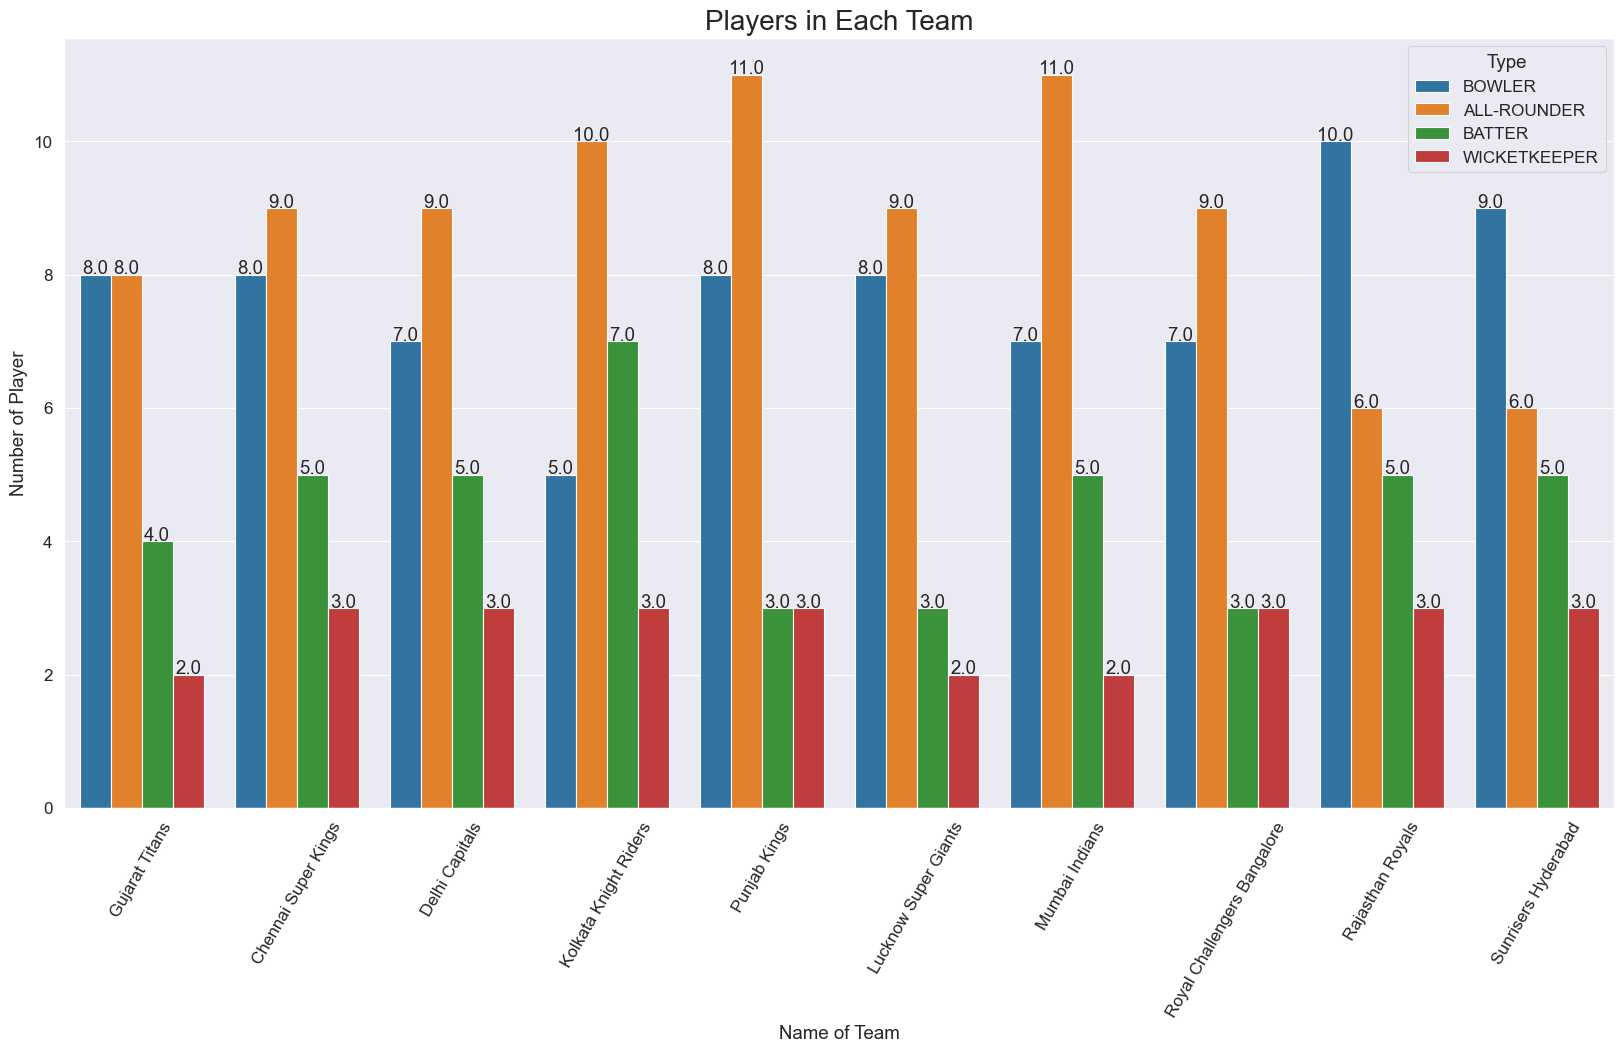

In [56]:
# Number of players in each team based on thier roles

plt.figure(figsize=(20,10))
fig = sns.countplot(x=df[df['Cur_Team'] != "Unsold"]['Cur_Team'],hue=df['Type'])
plt.title('Players in Each Team',fontsize= 20 )
plt.xlabel('Name of Team')
plt.ylabel('Number of Player')
plt.xticks(rotation=60)

for p in fig.patches:
    fig.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 4), textcoords='offset points')

    #Observation: 
    #This year Sunrisers Hydrabad and Rajasthan Royals are BOWLER Dominated Teams

In [71]:
# Highest Bid(successful ) by each team
df[df['retention']=='In Auction'].groupby(['Cur_Team'])['Sold_for_Lakh'].max().sort_values(ascending=False).reset_index()

,Cur_Team,Sold_for_Lakh
0,Lucknow Super Giants,17.00
1,Chennai Super Kings,16.00
2,Delhi Capitals,16.00
3,Mumbai Indians,16.00
4,Gujarat Titans,15.00
5,Royal Challengers Bangalore,15.00
6,Rajasthan Royals,14.00
7,Sunrisers Hyderabad,14.00
8,Kolkata Knight Riders,12.25
9,Punjab Kings,12.00


In [74]:
# Top Batters picked from Auction
df[ (df['retention'] == "In Auction") & (df['Type']=='BATTER') ].sort_values(by='Sold_for_Lakh',ascending=False)

,Player,Type,Sold_for_Lakh,Cost_in_dollars,Prev_Team,Cur_Team,status,retention,base_price
143,Rohit Sharma,BATTER,16.00,2080.0,Mumbai Indians,Mumbai Indians,sold,In Auction,0.0
168,Virat Kohli,BATTER,15.00,1950.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,0.0
214,Kane Williamson,BATTER,14.00,1820.0,Sunrisers Hyderabad,Sunrisers Hyderabad,sold,In Auction,0.0
71,Shreyas Iyer,BATTER,12.25,1592.5,Delhi Capitals,Kolkata Knight Riders,sold,In Auction,200.0
96,Mayank Agarwal,BATTER,12.00,1560.0,Punjab Kings,Punjab Kings,sold,In Auction,0.0
...,...,...,...,...,...,...,...,...,...
328,Usman Khawaja,BATTER,0.00,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,150.0
329,Brandon King,BATTER,0.00,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,50.0
330,Janneman Malan,BATTER,0.00,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,50.0
331,Rilee Rossouw,BATTER,0.00,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,100.0


In [76]:
# Highest Paid In Current team Mumbai Indians player
df[df['Cur_Team']=='Mumbai Indians']['Cost_in_dollars'].max()

2080.0

In [77]:
# Rankings of paying in current team Sunrisers Hyderabad
df[df['Cur_Team']=='Sunrisers Hyderabad'].sort_values(by='Cost_in_dollars',ascending=False)

,Player,Type,Sold_for_Lakh,Cost_in_dollars,Prev_Team,Cur_Team,status,retention,base_price
214,Kane Williamson,BATTER,14.00,1820.0,Sunrisers Hyderabad,Sunrisers Hyderabad,sold,In Auction,0.0
215,Nicholas Pooran,WICKETKEEPER,10.75,1397.5,Punjab Kings,Sunrisers Hyderabad,sold,In Auction,150.0
216,Washington Sundar,ALL-ROUNDER,8.75,1137.5,Royal Challengers Bangalore,Sunrisers Hyderabad,sold,In Auction,150.0
217,Rahul Tripathi,BATTER,8.50,1105.0,Kolkata Knight Riders,Sunrisers Hyderabad,sold,In Auction,40.0
218,Romario Shepherd,ALL-ROUNDER,7.75,1007.5,Not Participated in IPL 2021,Sunrisers Hyderabad,sold,In Auction,75.0
219,Abhishek Sharma,ALL-ROUNDER,6.50,845.0,Sunrisers Hyderabad,Sunrisers Hyderabad,sold,In Auction,20.0
220,Marco Jansen,ALL-ROUNDER,4.20,546.0,Mumbai Indians,Sunrisers Hyderabad,sold,In Auction,50.0
221,Bhuvneshwar Kumar,BOWLER,4.20,546.0,Sunrisers Hyderabad,Sunrisers Hyderabad,sold,In Auction,200.0
224,Umran Malik,BOWLER,4.00,520.0,Sunrisers Hyderabad,Sunrisers Hyderabad,sold,In Auction,0.0
225,Kartik Tyagi,BOWLER,4.00,520.0,Rajasthan Royals,Sunrisers Hyderabad,sold,In Auction,20.0


In [85]:
#Amount Spent by each team in Auction
amount_spent = df.groupby('Cur_Team')['Sold_for_Lakh'].sum()
amount_spent

Cur_Team
Chennai Super Kings            87.05
Delhi Capitals                 86.40
Gujarat Titans                 89.65
Kolkata Knight Riders          81.55
Lucknow Super Giants           89.40
Mumbai Indians                 89.90
Punjab Kings                   84.55
Rajasthan Royals               89.05
Royal Challengers Bangalore    88.45
Sunrisers Hyderabad            89.90
Unsold                          0.00
Name: Sold_for_Lakh, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Gujarat Titans'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Punjab Kings'),
  Text(5, 0, 'Lucknow Super Giants'),
  Text(6, 0, 'Mumbai Indians'),
  Text(7, 0, 'Royal Challengers Bangalore'),
  Text(8, 0, 'Rajasthan Royals'),
  Text(9, 0, 'Sunrisers Hyderabad')])

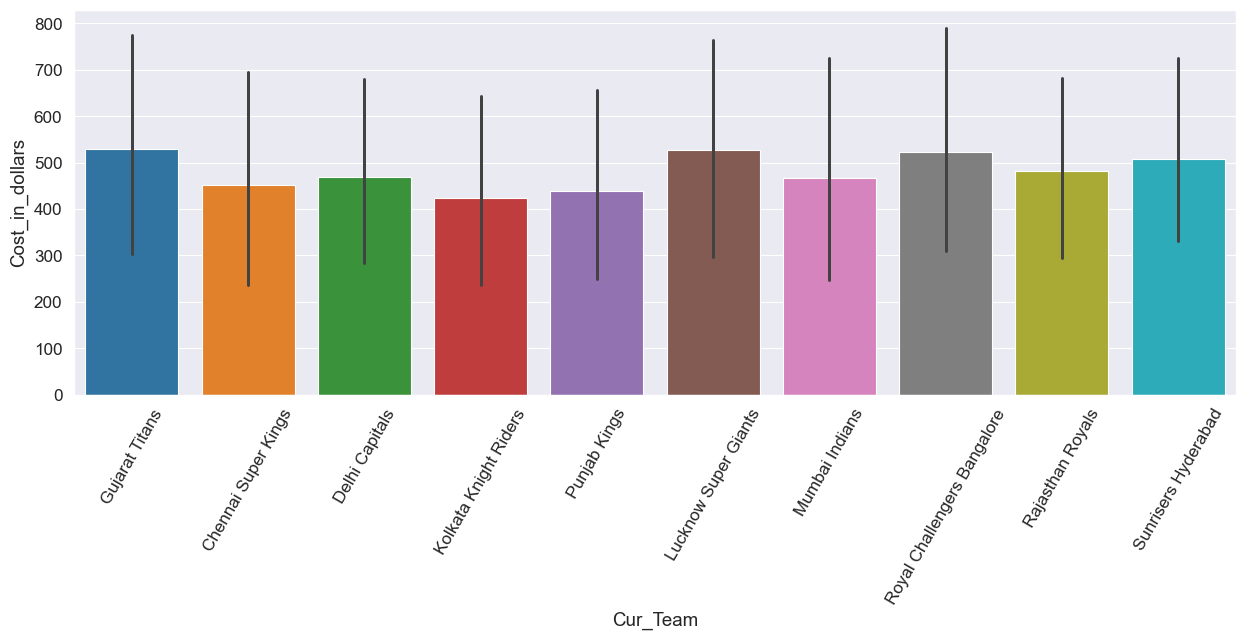

In [96]:
#Amount Spent by each team in Auction (Plot)
plt.figure(figsize=(15,5))
sns.barplot(x='Cur_Team', y='Cost_in_dollars', data=df[df['Cur_Team'] != 'Unsold'])
plt.xticks(rotation=60)




In [100]:
# List of players who Played IPL 2021 but went unsold this time
unsold_stars = df[ (df['Prev_Team'] != "Not Participated in IPL 2021") & (df['Cur_Team'] == 'Unsold')][ ['Player','Prev_Team'] ]
unsold_stars

,Player,Prev_Team
237,Suresh Raina,Chennai Super Kings
238,Steve Smith,Delhi Capitals
239,Shakib Al Hasan,Kolkata Knight Riders
240,Amit Mishra,Delhi Capitals
241,Adil Rashid,Punjab Kings
242,Imran Tahir,Chennai Super Kings
243,Mujeeb Zadran,Sunrisers Hyderabad
244,Adam Zampa,Royal Challengers Bangalore
245,Rajat Patidar,Royal Challengers Bangalore
246,Mohammed Azharuddeen,Royal Challengers Bangalore


In [103]:
unsold_stars.groupby('Prev_Team')['Player'].count()

Prev_Team
Chennai Super Kings            3
Delhi Capitals                 7
Kolkata Knight Riders          5
Mumbai Indians                 6
Punjab Kings                   5
Rajasthan Royals               3
Royal Challengers Bangalore    7
Sunrisers Hyderabad            4
Name: Player, dtype: int64